# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Read Data Dictionary

In [8]:
data_dict = pd.read_excel('Data_Dictionary.xlsx')

In [9]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


# Data Cleaning

we can drop the records with loan status = current 
as the loan is currently in progress and cannot contribute 
to conclusive evidence if the customer will default of pay in future

## Drop rows where loan status = current

In [10]:
prev_rows = len(df)
prev_rows

39717

In [11]:
df = df[df['loan_status'] != "Current"]

In [12]:
current_rows = len(df)
current_rows

38577

## Delete columns which are null for all the rows

In [13]:
round(100*df.isnull().mean(),2).dtype

dtype('float64')

In [14]:
null_cols =df.columns[df.isna().all()].tolist()

In [15]:
df = df.drop(null_cols, axis=1)

In [16]:
df.shape

(38577, 56)

## Percentage of missing values in each column

In [17]:
round(100*df.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.68
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.47
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

## dropping columns where null percentage is more than 60

In [19]:
df=df.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1)

In [20]:
df.shape

(38577, 54)

In [21]:
round(100*df.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.68
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.47
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

## analyse desc attribute which has 32% null values

In [22]:
df.desc.dtype

dtype('O')

In [23]:
df.desc.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      209
Debt Consolidation                                                                                                                                                                                                                                                                                                                                                            

### From the above result, we can see that this is a string attribute and filling the missing values will not help

In [24]:
df=df.drop('desc',axis=1)

In [25]:
df.shape

(38577, 53)

## analyse emp_title attribute which has 6% null values

In [26]:
df.emp_title.dtype

dtype('O')

In [27]:
df.emp_title.value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

### From the above result, we can see that this is a string attribute and filling the missing values will not help

In [28]:
df = df.drop('emp_title',axis=1)

In [29]:
df.shape

(38577, 52)

## analyse emp_length attribute which has 2% null values

In [30]:
df.emp_length.dtype

dtype('O')

In [31]:
df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

## lets convert this to integer and fill missing values.  we need to remove extra character and retain only numbers

In [32]:
df.emp_length = df.emp_length.str.replace('< ','')

In [33]:
df.emp_length = df.emp_length.str.replace('+','')

In [34]:
df.emp_length.value_counts()

10 years    8488
1 year      7677
2 years     4291
3 years     4012
4 years     3342
5 years     3194
6 years     2168
7 years     1711
8 years     1435
9 years     1226
Name: emp_length, dtype: int64

In [35]:
df.emp_length = df.emp_length.replace(to_replace=' \w+', regex=True, value='')

In [36]:
df.emp_length.value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

### fill missing values with median

In [37]:
df.emp_length.median()

4.0

In [38]:
df.emp_length.astype('float64').mean()

5.061048369912636

In [39]:
df.emp_length = df.emp_length.fillna(df.emp_length.median())

In [40]:
round(100*df.isnull().mean(),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal           

### analyse pub_rec_bankruptcies attribute which has 1.81% null values

In [41]:
df.pub_rec_bankruptcies.dtype

dtype('float64')

In [42]:
df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [43]:
df.pub_rec_bankruptcies.mean()

0.04347940865892291

In [44]:
df.pub_rec_bankruptcies.median()

0.0

In [45]:
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median())

In [46]:
round(100*df.isnull().mean(),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal           

#### Now that the percentage of missing values are negligible, we can drop these.

In [47]:
df = df[df['collections_12_mths_ex_med'].notna()]
df = df[df['title'].notna()]
df = df[df['revol_util'].notna()]
df = df[df['last_pymnt_d'].notna()]
df = df[df['last_credit_pull_d'].notna()]
df = df[df['tax_liens'].notna()]
df = df[df['chargeoff_within_12_mths'].notna()]


In [48]:
round(100*df.isnull().mean(),2)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util    

#### We do not have any null values for any of the attributes. Next we can start analysing the different attributes available and filter out the ones which are not required for analysis

###### member_id is a unique identifier and can be dropped.

In [50]:
df =df.drop(['member_id'],axis=1)

In [51]:
df.shape

(38391, 51)

###### we can Drop text/description columns which wont contribute to overall analysis

In [52]:
df = df.drop(['url', 'title'],  axis=1)

In [53]:
df.shape

(38391, 49)

### identify attributes with constant values and drop them

In [55]:
df.pymnt_plan.value_counts()

n    38391
Name: pymnt_plan, dtype: int64

In [56]:
df.initial_list_status.value_counts()

f    38391
Name: initial_list_status, dtype: int64

In [57]:
df.collections_12_mths_ex_med.value_counts()

0.0    38391
Name: collections_12_mths_ex_med, dtype: int64

In [58]:
df.chargeoff_within_12_mths.value_counts()

0.0    38391
Name: chargeoff_within_12_mths, dtype: int64

In [59]:
df.tax_liens.value_counts()

0.0    38391
Name: tax_liens, dtype: int64

In [60]:
df = df.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','chargeoff_within_12_mths','tax_liens'],axis=1)

In [61]:
df.shape

(38391, 43)

In [62]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

# Data Conversion

In [63]:
df.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

## Convert term from string to integer

In [64]:
df.term = df.term.apply(lambda x : int(x[:-7]))

In [65]:
df.int_rate = df.int_rate.apply(lambda x : float(x[:-1]))

## convert string to datetime

In [66]:
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')

In [67]:
df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39661   2007-08-01
39662   2007-08-01
39663   2007-08-01
39664   2007-08-01
39665   2007-08-01
Name: issue_d, Length: 38391, dtype: datetime64[ns]

## converting loan amt and funded amt to fload to perform math operations like mean

In [68]:
df.loan_amnt = df.loan_amnt.astype('float64')

In [69]:
df.funded_amnt = df.funded_amnt.astype('float64')

In [70]:
df.loan_amnt.value_counts().sort_index(ascending=False)

35000.0    600
34800.0      2
34675.0      1
34525.0      1
34475.0      5
          ... 
900.0        2
800.0        1
750.0        1
725.0        1
500.0        5
Name: loan_amnt, Length: 869, dtype: int64

# Derived Metrics

### Adding additional column for Year and Month for analysis extrating Year and Month from issue_d

In [71]:
df['issue_year'] = pd.DatetimeIndex(df.issue_d).year
df['issue_month'] = pd.DatetimeIndex(df.issue_d).month

In [72]:
df.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,...,0.0,Jan-15,171.62,May-16,INDIVIDUAL,0,0,0.0,2011,12


### Create bucket for Annual Income

In [73]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

df['annual_inc_bucket'] = df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

# Univariate Analysis

##### Now that we are done with cleaning and conversion, we can plot graphs and begin the analysis

## Numerical

#### Loan Amount

In [74]:
df.loan_amnt.describe()

count    38391.000000
mean     11067.764580
std       7348.003041
min        500.000000
25%       5400.000000
50%       9775.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

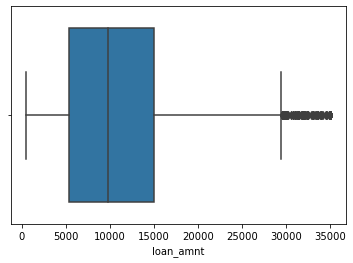

In [75]:
sns.boxplot(df.loan_amnt)
plt.show()

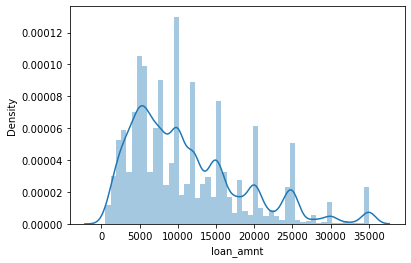

In [76]:
sns.distplot(df.loan_amnt)
plt.show()

##### Majority of the loan amount lies between 5k to 15k

### Funded Amount

In [77]:
df.funded_amnt.describe()

count    38391.000000
mean     10803.752833
std       7089.611563
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

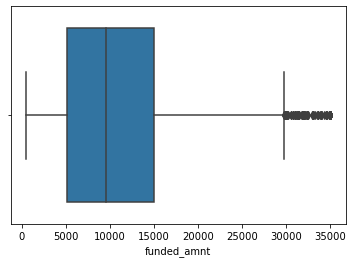

In [78]:
sns.boxplot(df.funded_amnt)
plt.show()

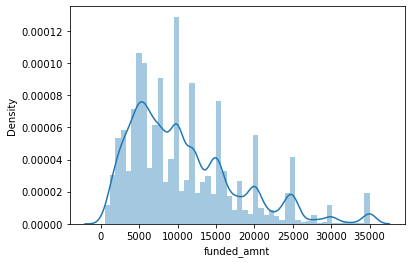

In [79]:
sns.distplot(df.funded_amnt)
plt.show()

##### Majority of the funded amount lies between 5k to 15k

### Annual Income

In [80]:
df.annual_inc.describe()

count    3.839100e+04
mean     6.882415e+04
std      6.426417e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

###### let us remove the outliers and see the result again

In [81]:
df = df[df.annual_inc < df.annual_inc.quantile(0.99)]

In [82]:
df.annual_inc.describe()

count     38007.000000
mean      65358.126212
std       35102.921248
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80400.000000
max      234000.000000
Name: annual_inc, dtype: float64

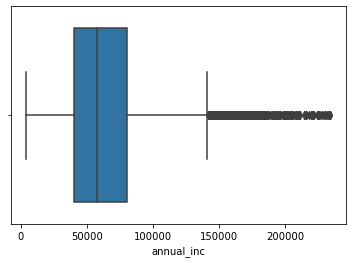

In [83]:
sns.boxplot(df.annual_inc)
plt.show()

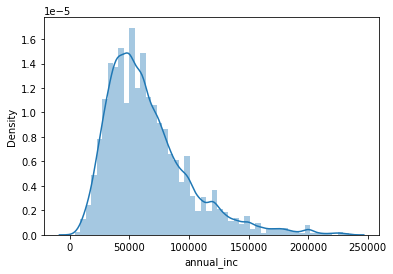

In [84]:
sns.distplot(df.annual_inc)
plt.show()

###### Majority of the data lies between 35K to 80K

### Interest Rate

In [85]:
df.int_rate.describe()

count    38007.000000
mean        11.912543
std          3.683682
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

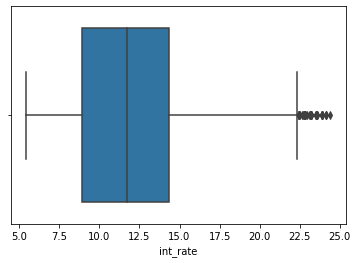

In [86]:
sns.boxplot(df.int_rate)
plt.show()

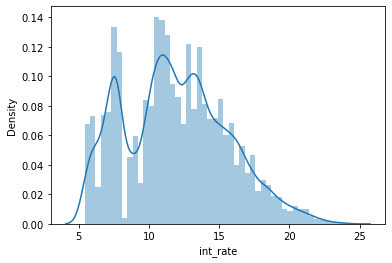

In [87]:
sns.distplot(df.int_rate)
plt.show()

##### Majority of the data lies in the rage of 7% to 14%

### Installment

In [88]:
df.installment.describe()

count    38007.000000
mean       320.459803
std        205.934677
min         15.690000
25%        165.740000
50%        276.950000
75%        422.330000
max       1305.190000
Name: installment, dtype: float64

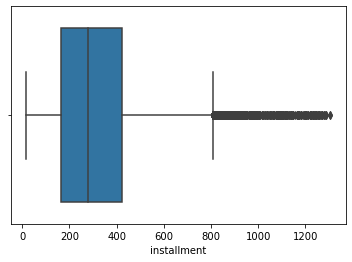

In [89]:
sns.boxplot(df.installment)
plt.show()

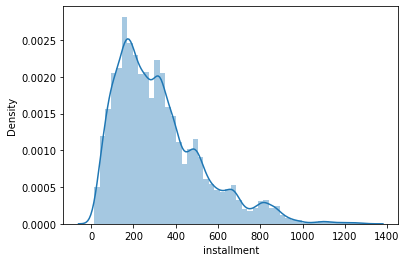

In [90]:
sns.distplot(df.installment)
plt.show()

##### Majority of the data lies in the rage of 150  to 400

### Debt To Income Ratio

In [91]:
df.dti.describe()

count    38007.000000
mean        13.346982
std          6.653329
min          0.000000
25%          8.230000
50%         13.440000
75%         18.610000
max         29.990000
Name: dti, dtype: float64

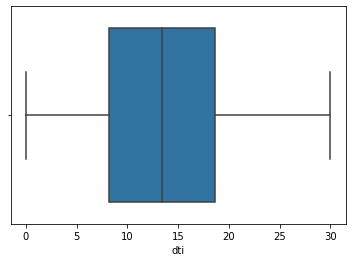

In [92]:
sns.boxplot(df.dti)
plt.show()

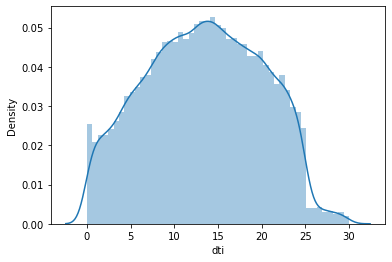

In [93]:
sns.distplot(df.dti)
plt.show()

##### Majority of the data is in 0-25

## Categorical

### Home Ownership

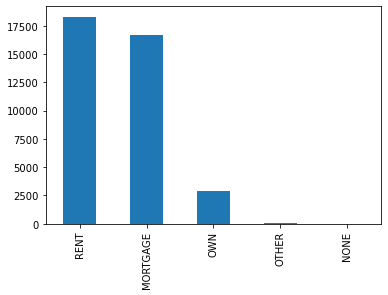

In [94]:
df.home_ownership.value_counts().plot.bar()
plt.show()

###### Majority are in Rent and Mortgage

### Purpose

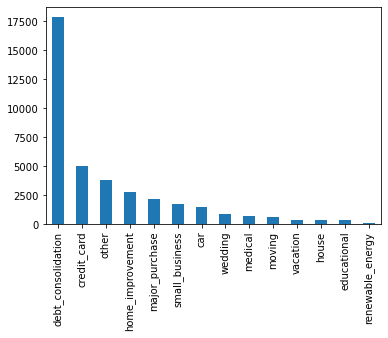

In [95]:
df.purpose.value_counts().plot.bar()
plt.show()

###### Majority of the loan applicants are in debt_consolidation category

### Address State

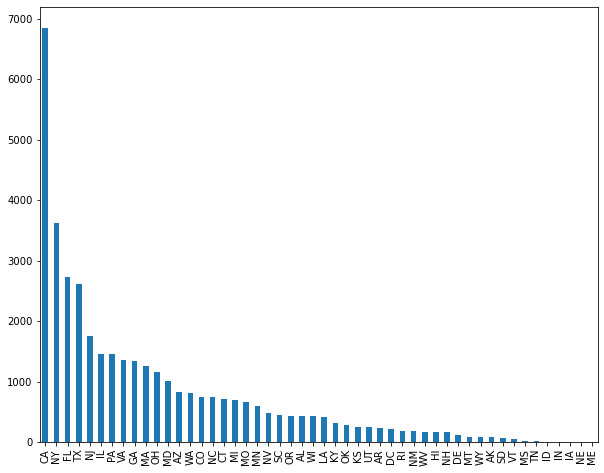

In [96]:
plt.figure(figsize=(10,8))
df.addr_state.value_counts().plot.bar()
plt.show()

###### Majority of the loan applicants are from California

### Term

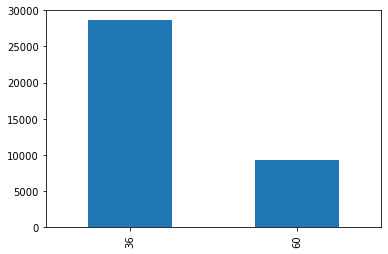

In [97]:
df.term.value_counts().plot.bar()
plt.show()

###### Majority of loan applicanttions have a term of 36 months

### Grade

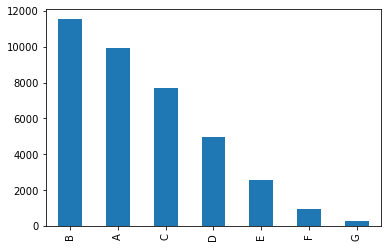

In [98]:
df.grade.value_counts().plot.bar()
plt.show()

###### Majority of loan applications fall in Grade B

### Employment Length

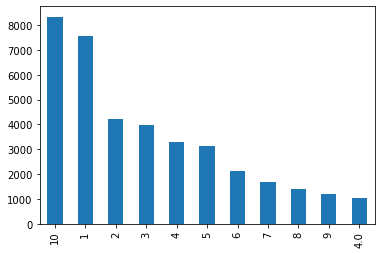

In [99]:
df.emp_length.value_counts().plot.bar()
plt.show()

###### Majority of loan applications have employment length of 10+ years

### Loan Issued Year

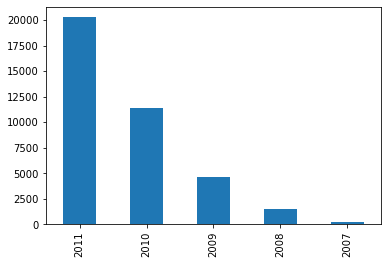

In [100]:
df.issue_year.value_counts().plot.bar()
plt.show()

###### Maximum loan applications are from 2011 and they are increasing year on year

### Loan Issued Month

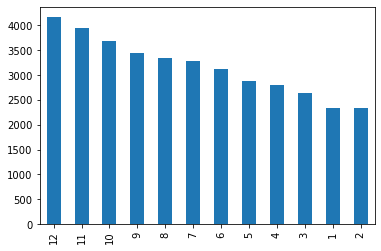

In [101]:
df.issue_month.value_counts().plot.bar()
plt.show()

###### This shows that the applications increase by end of the year and drop down at the start of the year

# Bivariate Analysis

### Functions to get ratios of different columns affecting loan_status

In [122]:
def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plt.figure(figsize=[25,8])
    plt.title('Charged Off : ' + column)
    rw = ratio_wise(df, column)
    if invert:
        sns.barplot(rw['charge_off_ratio'], rw[column])
    else:
        sns.barplot(rw[column], rw['charge_off_ratio'])
    plt.tight_layout()
    plt.show()
    return rw

### term vs loan status

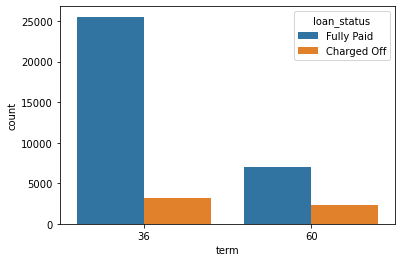

In [103]:
sns.countplot(x='term', hue='loan_status', data=df)
plt.show()

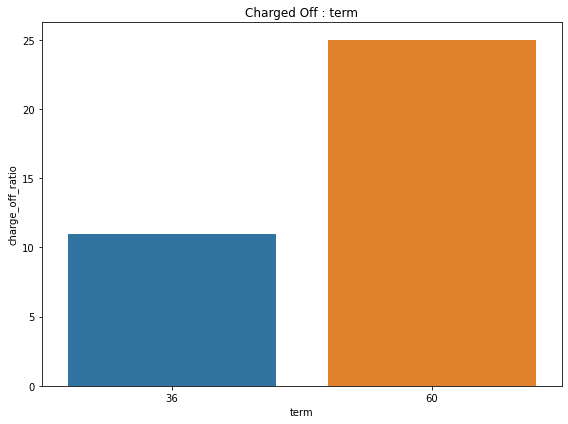

loan_status,term,Charged Off,Fully Paid,total,charge_off_ratio
0,36,3131,25528,28659,11.0
1,60,2361,6987,9348,25.0


In [104]:
ratio_wise_plot(df, 'term')

***
- Majority of loans are in the category of term 36.
- Charge Offs ratio for the term 60 is 25% whereas term 36 is 10%

**Inference:**	
- Charge Offs are higher for the loan applications with term 60
***

### grade vs loan status

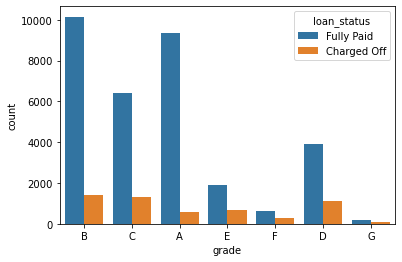

In [105]:
sns.countplot(x='grade', hue='loan_status', data=df)
plt.show()

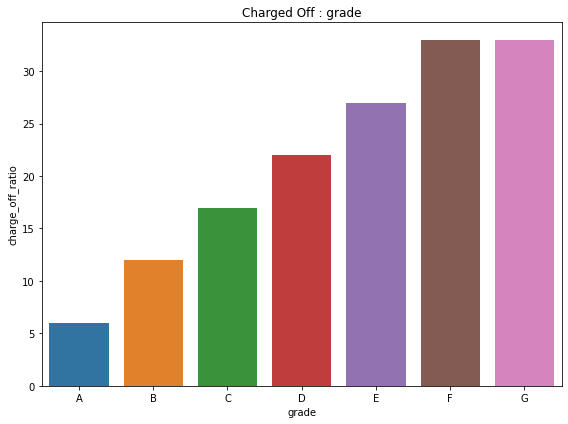

loan_status,grade,Charged Off,Fully Paid,total,charge_off_ratio
0,A,595,9353,9948,6.0
1,B,1397,10151,11548,12.0
2,C,1311,6390,7701,17.0
3,D,1095,3897,4992,22.0
4,E,691,1897,2588,27.0
5,F,308,637,945,33.0
6,G,95,190,285,33.0


In [106]:
ratio_wise_plot(df, 'grade')

***
- Majority of loan application is from grade B.
- Charge Offs are higher for grades B and C.
- But the ratio of Charge Offs are higher for grades F and G.

**Inferences:**
- Lower the grade, higher the possibility of charge off.
***

### emp_length vs loan status

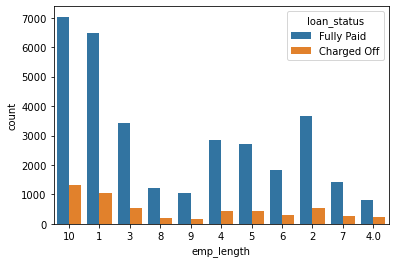

In [107]:
sns.countplot(x='emp_length', hue='loan_status', data=df)
plt.show()

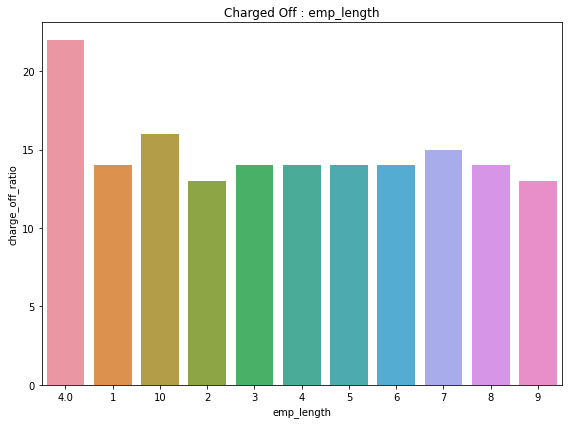

loan_status,emp_length,Charged Off,Fully Paid,total,charge_off_ratio
0,4.0,220,799,1019,22.0
1,1,1064,6494,7558,14.0
2,10,1306,7034,8340,16.0
3,2,552,3675,4227,13.0
4,3,544,3418,3962,14.0
5,4,447,2849,3296,14.0
6,5,445,2705,3150,14.0
7,6,301,1843,2144,14.0
8,7,261,1429,1690,15.0
9,8,199,1213,1412,14.0


In [108]:
ratio_wise_plot(df, 'emp_length')

***
- Highest Charge Offs are in the employee length categoty of 10 Years and above
- Charge Off ratio within the categories itself are similar and inconclusive
***

### home ownership vs loan status

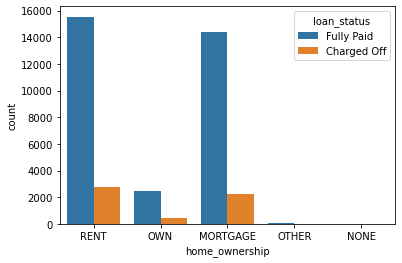

In [109]:
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.show()

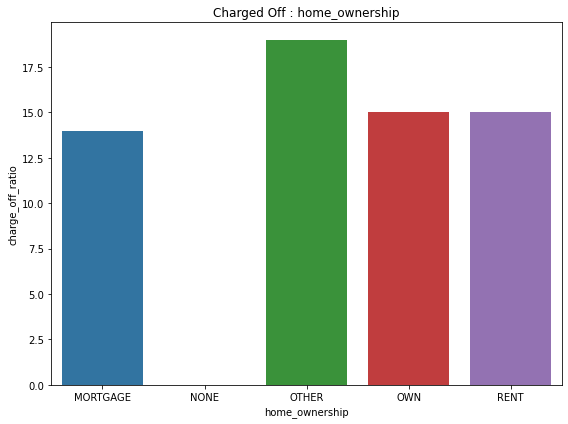

loan_status,home_ownership,Charged Off,Fully Paid,total,charge_off_ratio
0,MORTGAGE,2278.0,14415.0,16693.0,14.0
1,NONE,NaN,1.0,NaN,NaN
2,OTHER,18.0,76.0,94.0,19.0
3,OWN,433.0,2495.0,2928.0,15.0
4,RENT,2763.0,15528.0,18291.0,15.0


In [110]:
ratio_wise_plot(df, 'home_ownership')

***
- Charge Offs are more in the category of RENT and MORTGAGE

**Inference:**
- looking at the ratio stats, this category does not give meaningful insights
***

### purpose vs loan status

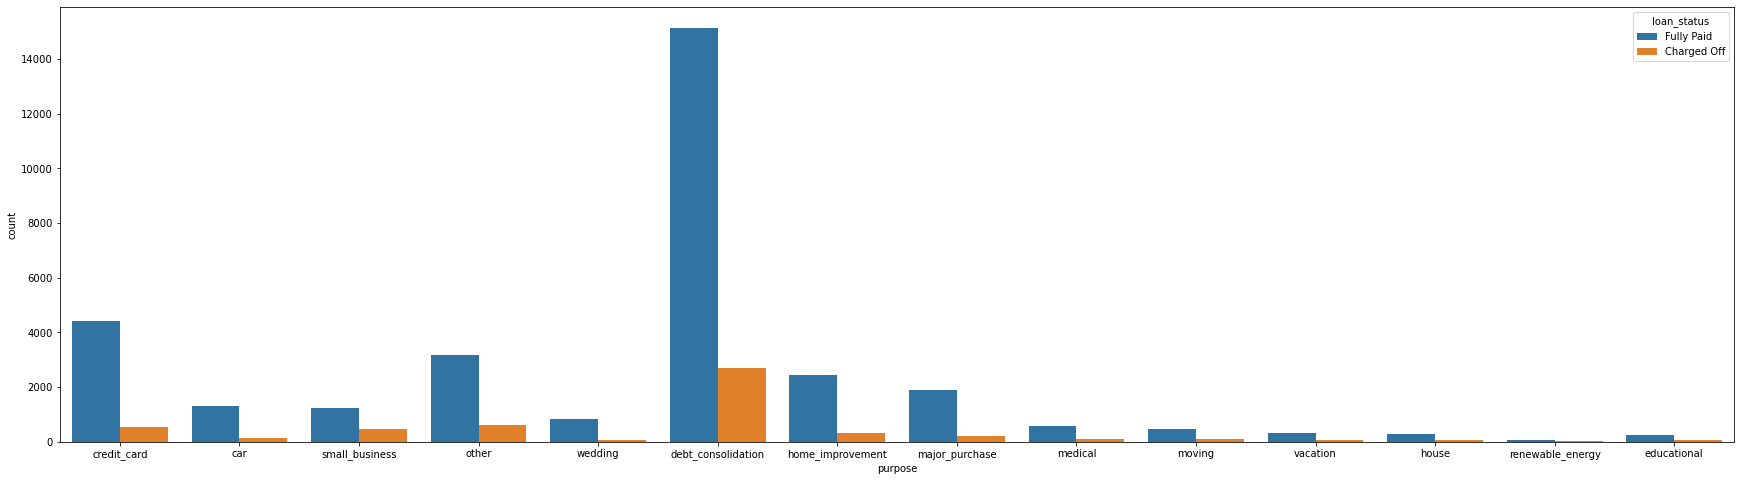

In [111]:
plt.figure(figsize=(30,8))
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.show()

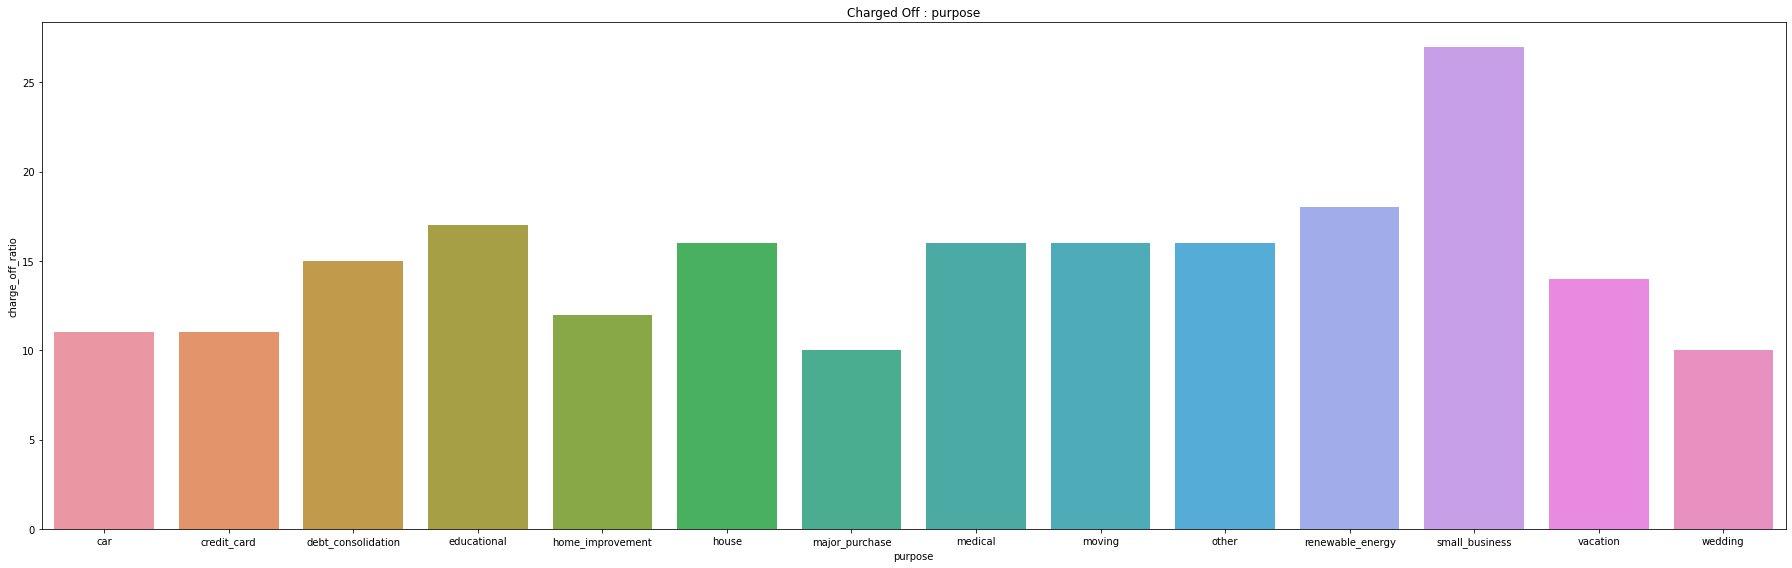

loan_status,purpose,Charged Off,Fully Paid,total,charge_off_ratio
0,car,159,1329,1488,11.0
1,credit_card,532,4436,4968,11.0
2,debt_consolidation,2717,15144,17861,15.0
3,educational,52,260,312,17.0
4,home_improvement,330,2450,2780,12.0
5,house,56,298,354,16.0
6,major_purchase,214,1904,2118,10.0
7,medical,105,567,672,16.0
8,moving,91,475,566,16.0
9,other,617,3185,3802,16.0


In [124]:
ratio_wise_plot(df, 'purpose')

***
- debt_consolidation loans are having the highest charge offs.
- But the ratio of charge offs is higher for small business.

**Inferences:**
- Debt consolidation loans have highest risk of charge offs, whereas the probability of charge off is more for small business loans.
***

### addr_state vs loan status

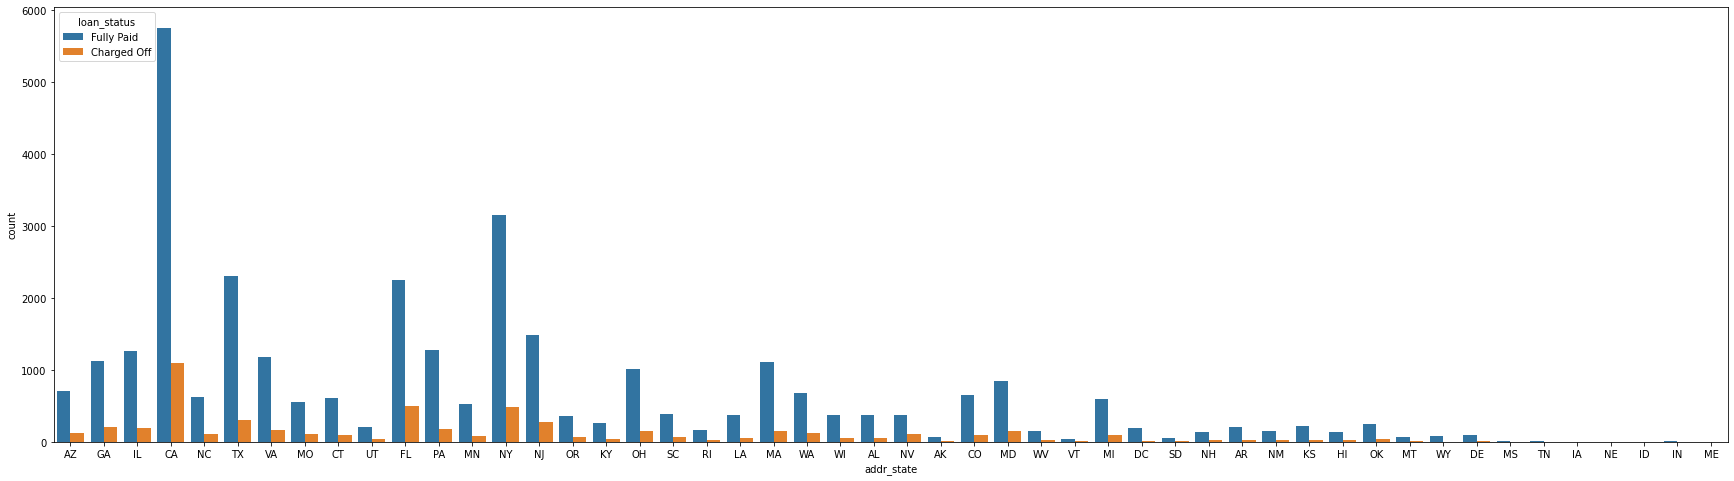

In [113]:
plt.figure(figsize=(30,8))
sns.countplot(x='addr_state', hue='loan_status', data=df)
plt.show()

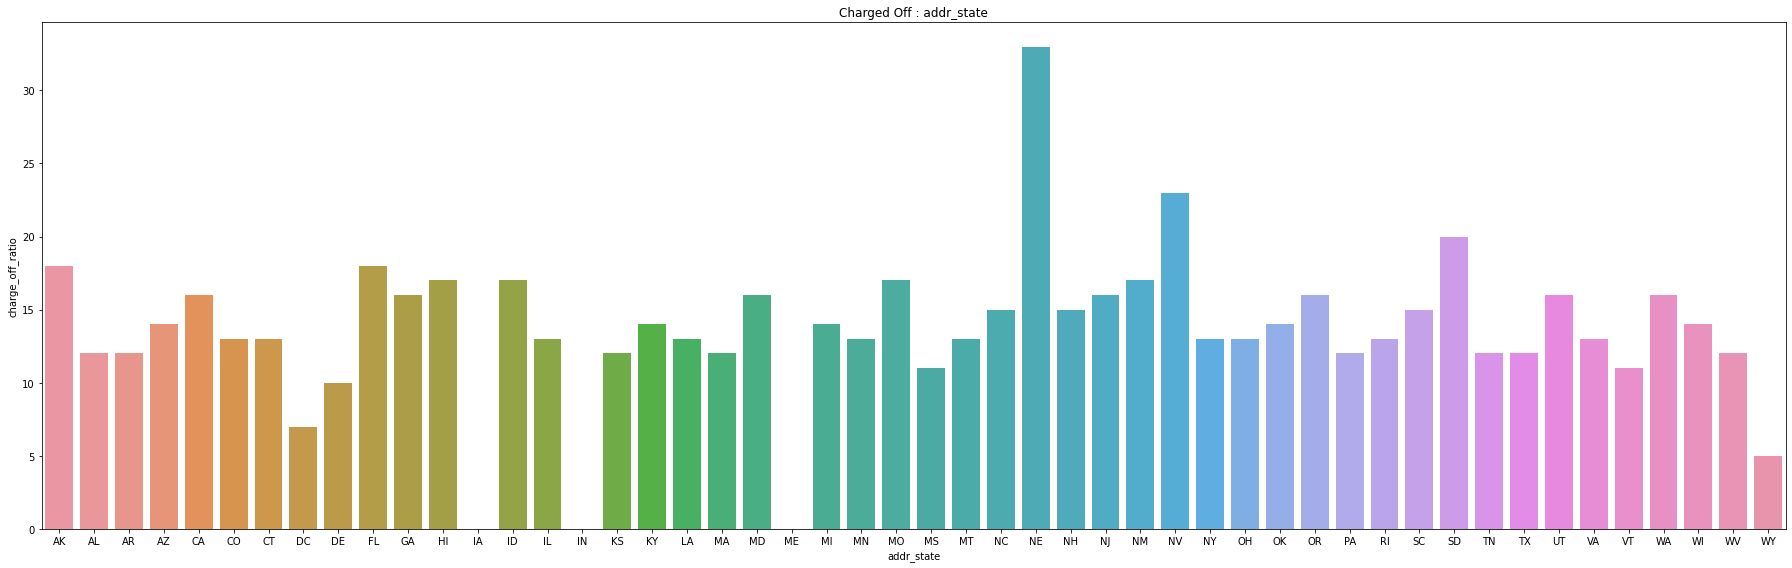

loan_status,addr_state,Charged Off,Fully Paid,total,charge_off_ratio
0,AK,14.0,63.0,77.0,18.0
1,AL,52.0,378.0,430.0,12.0
2,AR,27.0,207.0,234.0,12.0
3,AZ,120.0,714.0,834.0,14.0
4,CA,1095.0,5757.0,6852.0,16.0
5,CO,96.0,655.0,751.0,13.0
6,CT,93.0,617.0,710.0,13.0
7,DC,15.0,194.0,209.0,7.0
8,DE,11.0,101.0,112.0,10.0
9,FL,492.0,2246.0,2738.0,18.0


In [123]:
ratio_wise_plot(df, 'addr_state')

***
- The hghest Charge Offs are from CA
- When we look at the ratio, states NE and NV has the highest Charge Offs

- **Inferences**
    - Loan applications from NE have high risk of Charge Offs
***

### pub_rec_bankruptcies vs loan status

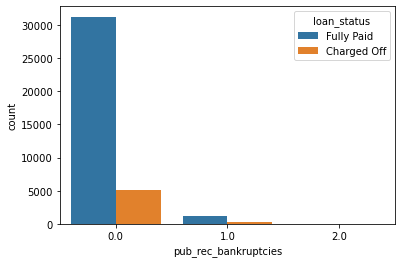

In [115]:
# plt.figure(figsize=(30,8))
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=df)
plt.show()

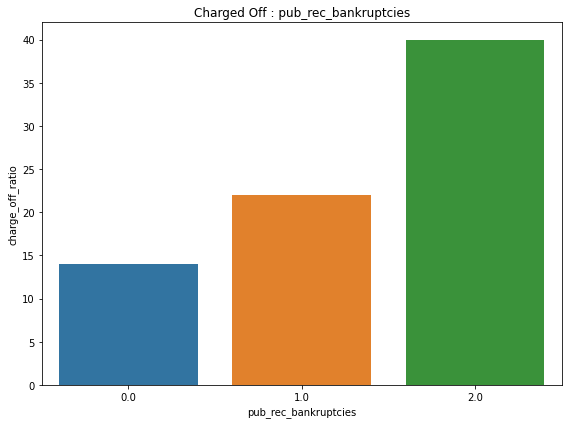

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,5132,31246,36378,14.0
1,1.0,358,1266,1624,22.0
2,2.0,2,3,5,40.0


In [116]:
ratio_wise_plot(df, 'pub_rec_bankruptcies')

***
**Inferences:**
- Customers having bankruptcy record are at high risk of Charge Offs
***

### annual income bucket vs loan status

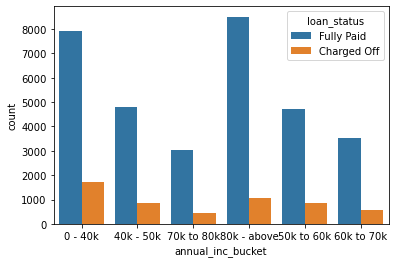

In [117]:
sns.countplot(x='annual_inc_bucket', hue='loan_status', data=df)
plt.show()

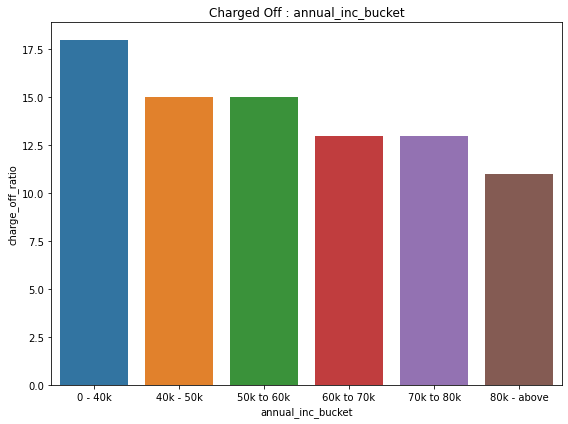

loan_status,annual_inc_bucket,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1707,7907,9614,18.0
1,40k - 50k,847,4818,5665,15.0
2,50k to 60k,861,4700,5561,15.0
3,60k to 70k,551,3533,4084,13.0
4,70k to 80k,455,3053,3508,13.0
5,80k - above,1071,8504,9575,11.0


In [118]:
ratio_wise_plot(df, 'annual_inc_bucket')

***
**Inference:**
- Higher the salary, less is the chance of change off
***